In [40]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
from scipy.cluster.hierarchy import dendrogram, linkage
from bioinfokit.visuz import cluster
from collections import Counter
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split

In [41]:
df = pd.read_csv('mcdonalds.csv')

In [44]:
binary_df = (df.iloc[:, :11] == "Yes").astype(int)
column_means = np.round(binary_df.mean(), 2)
print(column_means)

yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
fast          0.90
cheap         0.60
tasty         0.64
expensive     0.36
healthy       0.20
disgusting    0.24
dtype: float64


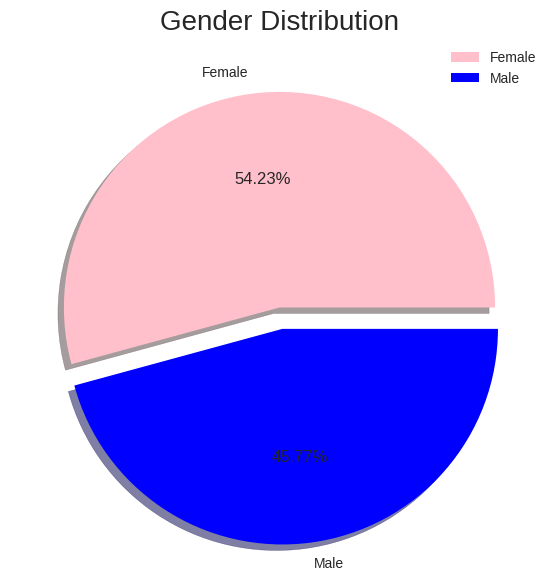

In [45]:
gender_labels = ['Female', 'Male']
gender_sizes = df['Gender'].value_counts()
colors = ['pink', 'blue']
explode = [0, 0.1]
plt.figure(figsize=(7, 7))
plt.pie(gender_sizes, colors=colors, explode=explode, labels=gender_labels, shadow=True, autopct='%.2f%%')
plt.title('Gender Distribution', fontsize=20)
plt.axis('off')
plt.legend()
plt.show()

/tmp/ipykernel_22121/4012450213.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  age_plot = sns.countplot(x=df['Age'], palette='viridis')


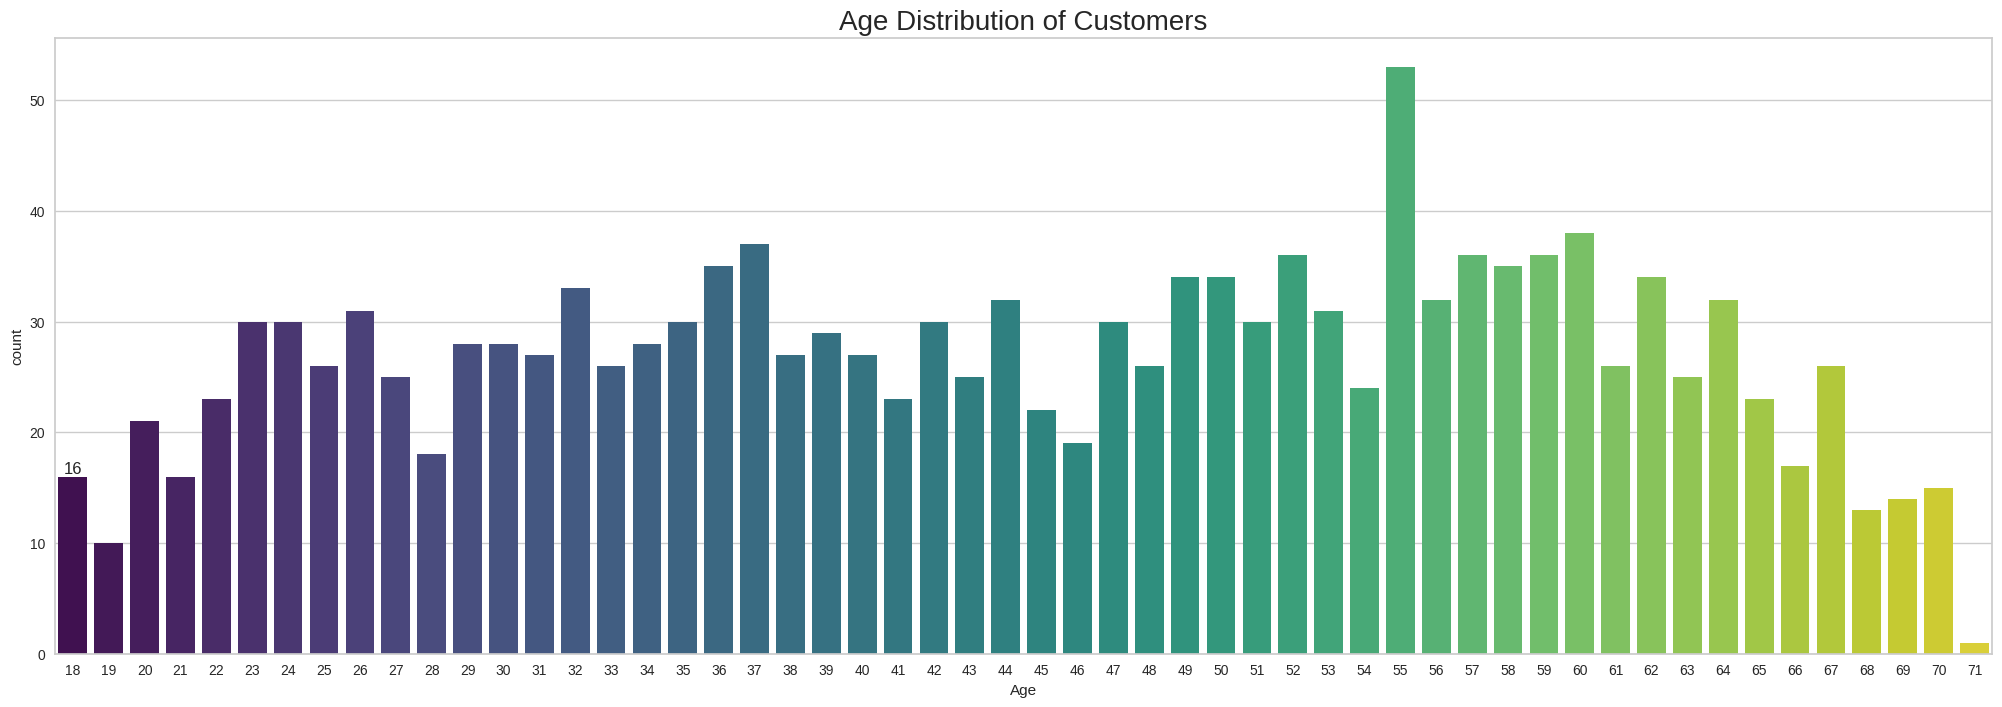

In [46]:
plt.figure(figsize=(25, 8))
age_plot = sns.countplot(x=df['Age'], palette='viridis')
age_plot.bar_label(age_plot.containers[0])
plt.title('Age Distribution of Customers', fontsize=20)
plt.show()

/tmp/ipykernel_22121/4064266049.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(df, x="Like", y="Age", height=5, aspect=2, palette="Set2", kind="swarm")


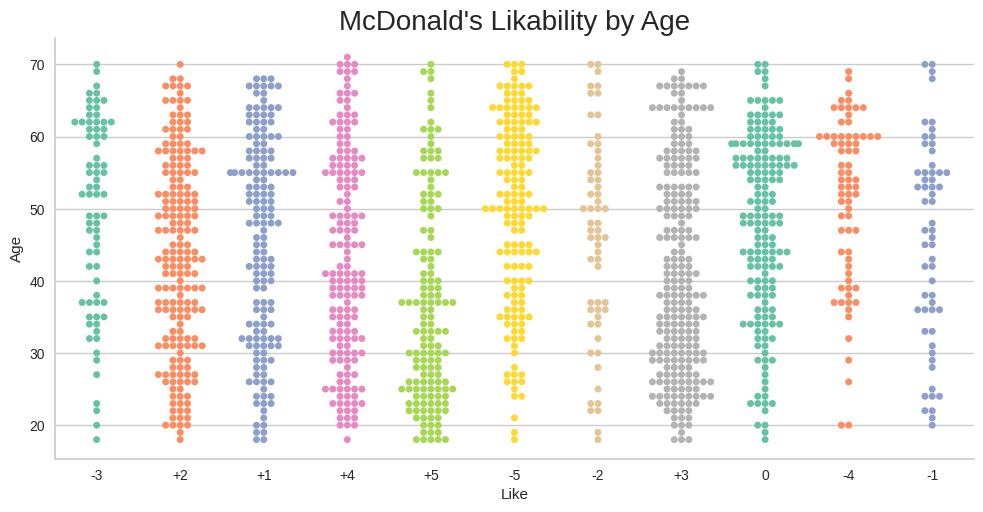

In [48]:
df['Like'] = df['Like'].replace({'I hate it!-5': '-5', 'I love it!+5': '+5'})
sns.catplot(df, x="Like", y="Age", height=5, aspect=2, palette="Set2", kind="swarm")
plt.title('McDonald\'s Likability by Age', fontsize=20)
plt.show();

In [49]:
columns_to_encode = ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting']
df_encoded = df.drop(columns=['Like', 'Age', 'VisitFrequency', 'Gender']).apply(LabelEncoder().fit_transform)

In [63]:
def perform_eda(df, fig_size):
    categorical = []
    continuous = []
    plt.figure(figsize=fig_size)
    subplot_index = 1

    for column in df.columns:
        if df[column].dtype == "object":
            categorical.append(column)
            plt.subplot((df.shape[1] + 1) // 2, 2, subplot_index)
            subplot_index += 1
            sns.countplot(df, x=column)
        else:
            continuous.append(column)

    for column in continuous:
        plt.subplot((df.shape[1] + 1) // 2, 2, subplot_index)
        subplot_index += 1
        sns.histplot(df[column].dropna(), kde=False)

    print(df[continuous].corr())

                    Like       Age  VisitFrequency    Gender  cluster_num
Like            1.000000  0.170589        0.038111  0.034551    -0.408663
Age             0.170589  1.000000       -0.035073 -0.019852    -0.144073
VisitFrequency  0.038111 -0.035073        1.000000 -0.015946    -0.029971
Gender          0.034551 -0.019852       -0.015946  1.000000    -0.068577
cluster_num    -0.408663 -0.144073       -0.029971 -0.068577     1.000000


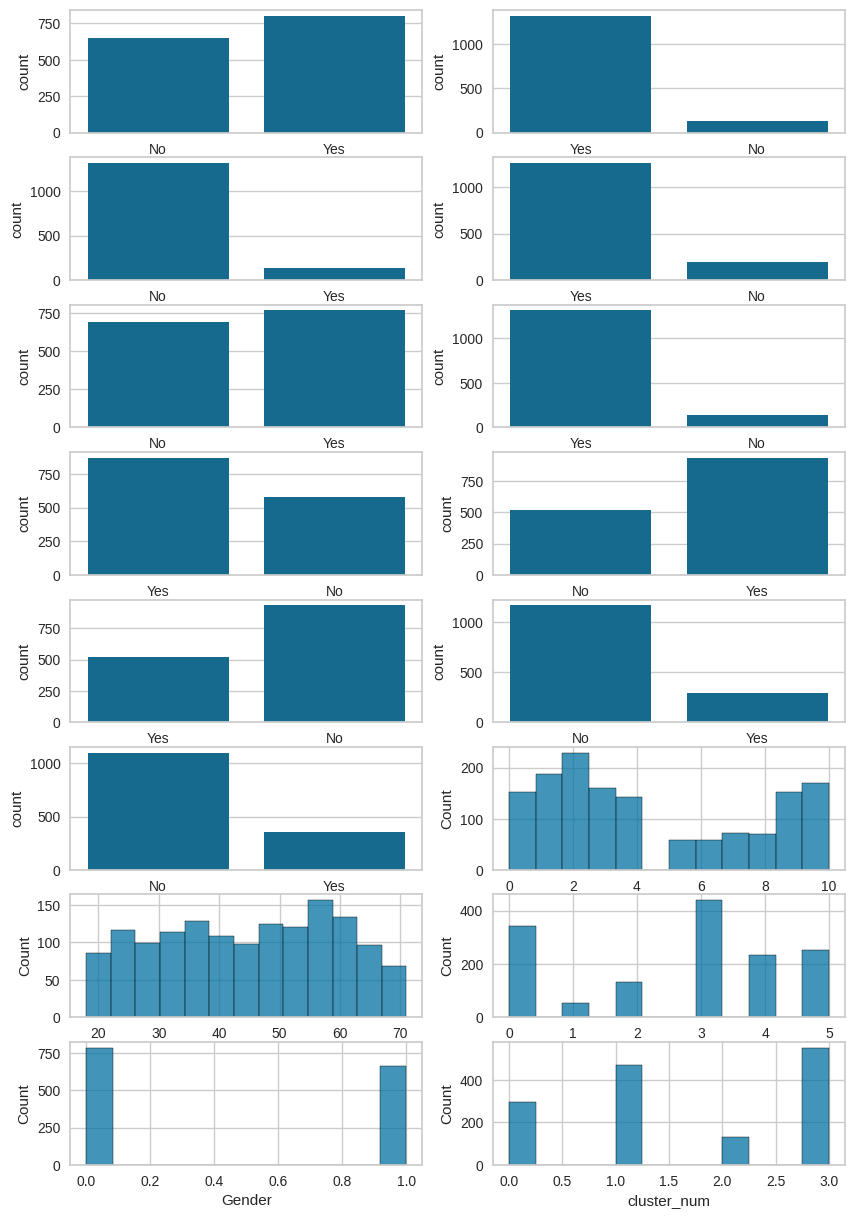

In [64]:
perform_eda(df, (10,15))

In [ ]:
scaled_df =  StandardScaler().fit_transform(df_encoded)
pca = PCA(n_components=11)
principal_components = pca.fit_transform(scaled_df)
principal_df = pd.dfFrame(df=principal_components, columns=['PC'+str(i) for i in range(1, 12)])
print(pca.explained_variance_ratio_)

[0.25556637 0.14834762 0.12546909 0.09826971 0.08348356 0.07109102
 0.06498559 0.05384477 0.04762809 0.02796379 0.0233504 ]


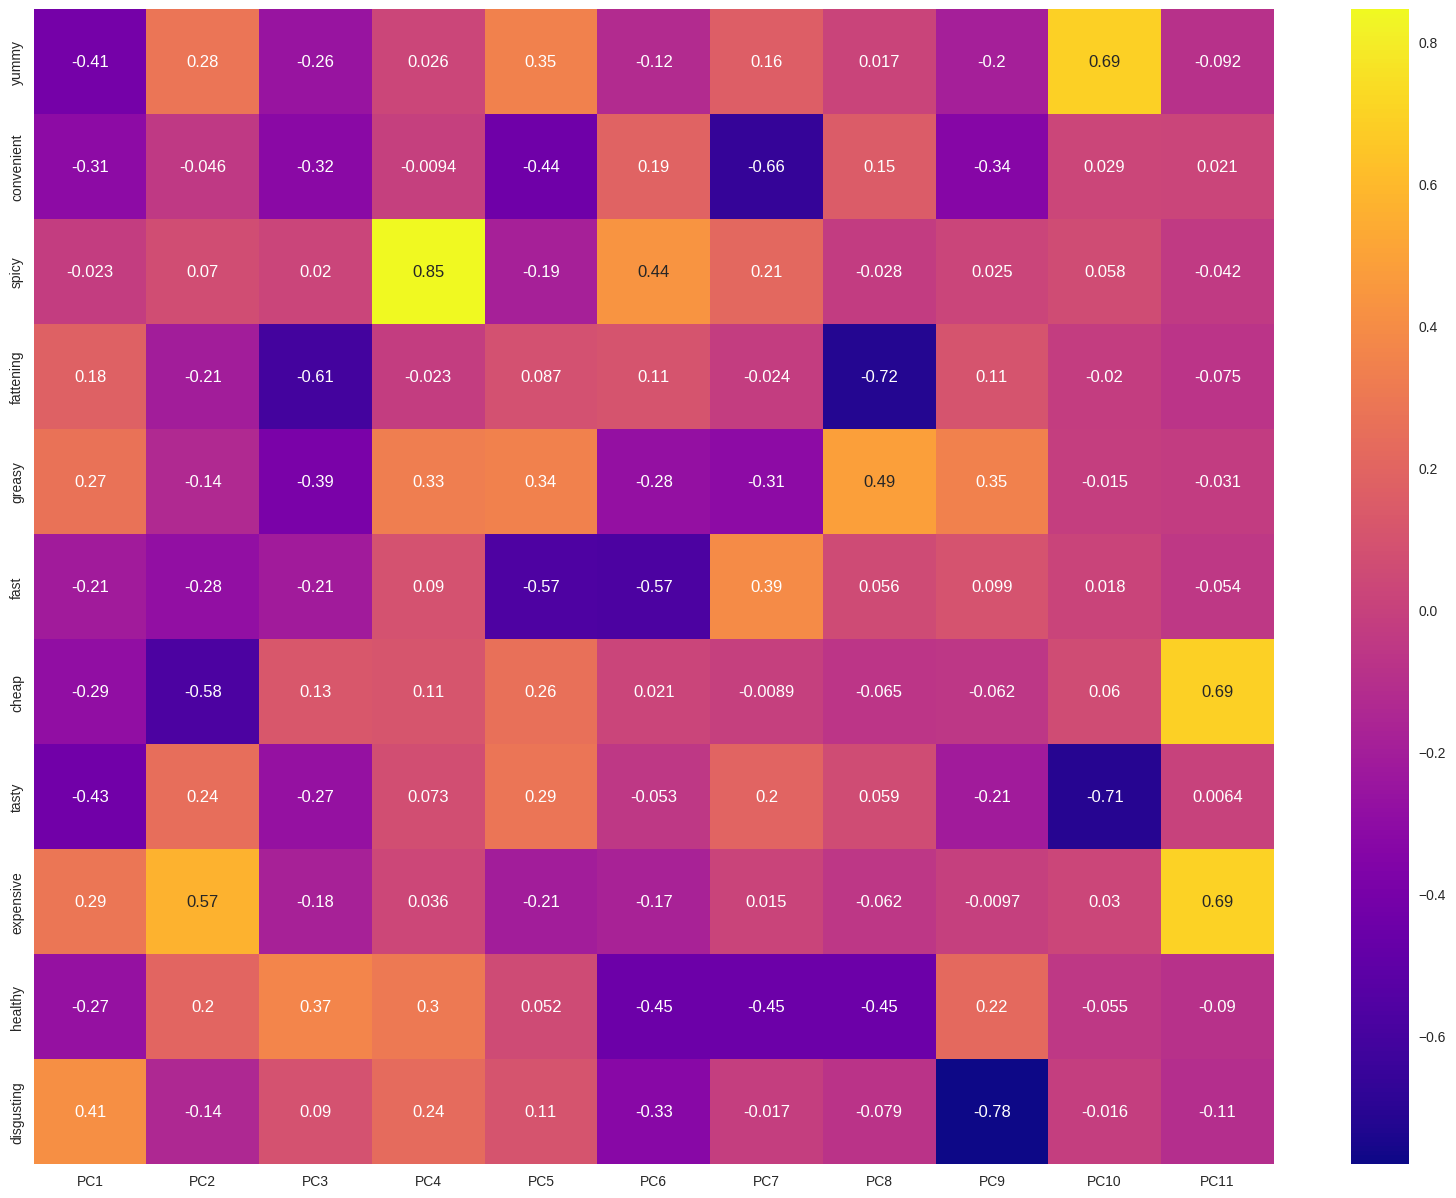

In [ ]:

loadings_df = pd.dfFrame(pca.components_.T, columns=['PC'+str(i) for i in range(1, 12)], index=df_encoded.columns)
plt.figure(figsize=(20, 15))
sns.heatmap(loadings_df, annot=True, cmap='plasma')
plt.show()

In [52]:
pca_scores = PCA().fit_transform(scaled_df)
cluster.biplot(cscore=pca_scores, loadings=pca.components_, labels=df_encoded.columns, var1=round(pca.explained_variance_ratio_[0]*100, 2), var2=round(pca.explained_variance_ratio_[1]*100, 2), show=True, dim=(10, 5))

NameError: name 'scaled_df' is not defined

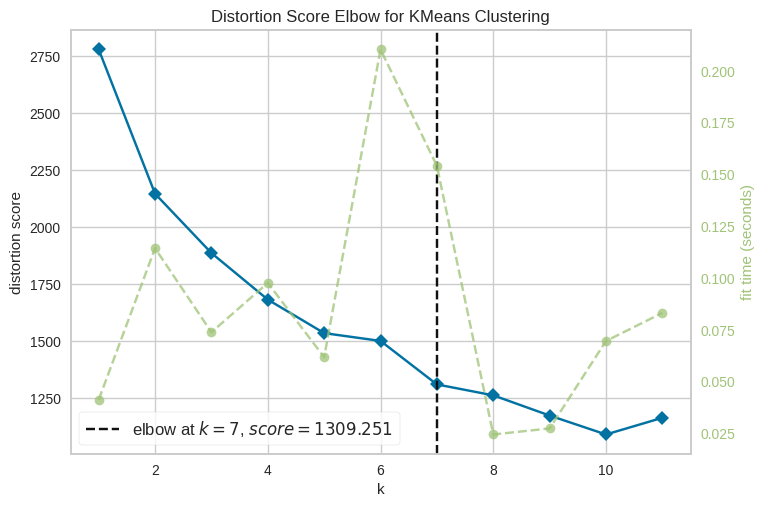

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [53]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(df_encoded)
visualizer.show()

In [54]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df_encoded)
df['cluster_num'] = kmeans.labels_
print('Labels:', kmeans.labels_)
print('WCSS:', kmeans.inertia_)
print('No. of iterations:', kmeans.n_iter_)
print('Cluster centroids:', kmeans.cluster_centers_)
print('Cluster size:', Counter(kmeans.labels_))

Labels: [0 3 1 ... 1 3 1]
WCSS: 1748.9687521158007
No. of iterations: 9
Cluster centroids: [[ 2.70270270e-02  8.47972973e-01  6.08108108e-02  9.05405405e-01
   6.11486486e-01  9.29054054e-01  8.41216216e-01 -9.99200722e-16
   5.40540541e-02  8.10810811e-02  4.45945946e-01]
 [ 5.11627907e-01  8.43551797e-01  9.30232558e-02  9.06976744e-01
   6.19450317e-01  8.01268499e-01  2.11416490e-02  5.60253700e-01
   9.83086681e-01  1.33192389e-01  3.46723044e-01]
 [ 0.00000000e+00  9.61832061e-01  1.37404580e-01  8.70229008e-01
   5.19083969e-01  9.38931298e-01  8.39694656e-01  1.00000000e+00
   5.34351145e-02  1.45038168e-01  1.75572519e-01]
 [ 1.00000000e+00  9.81916817e-01  1.01265823e-01  8.11934901e-01
   4.03254973e-01  9.60216998e-01  9.05967450e-01  9.76491863e-01
   5.78661844e-02  3.30922242e-01  6.14828210e-02]]
Cluster size: Counter({3: 553, 1: 473, 0: 296, 2: 131})


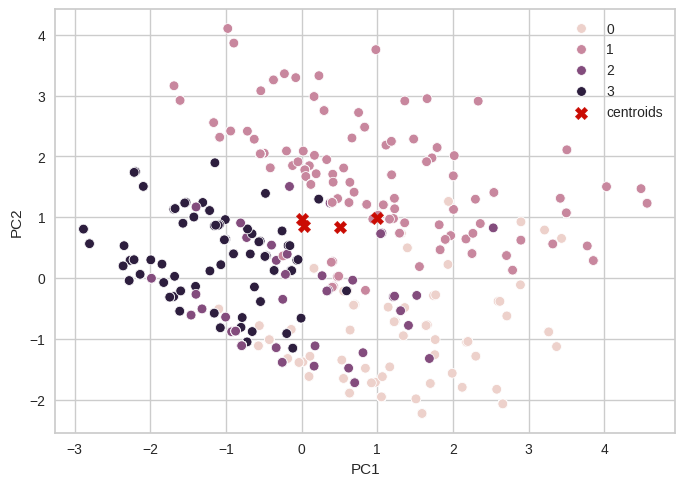

In [65]:
sns.scatterplot(principal_df, x="PC1", y="PC2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()

<Figure size 700x500 with 0 Axes>

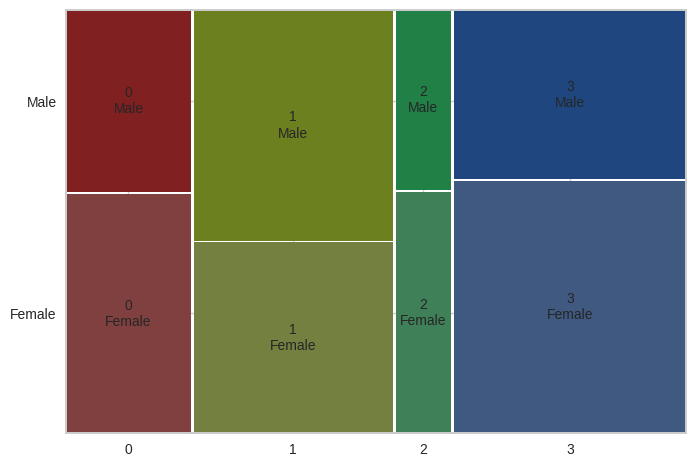

In [ ]:
gender_crosstab = pd.crosstab(df['cluster_num'], df['Gender'])
plt.figure(figsize=(7, 5))
mosaic(gender_crosstab.stack())
plt.show()

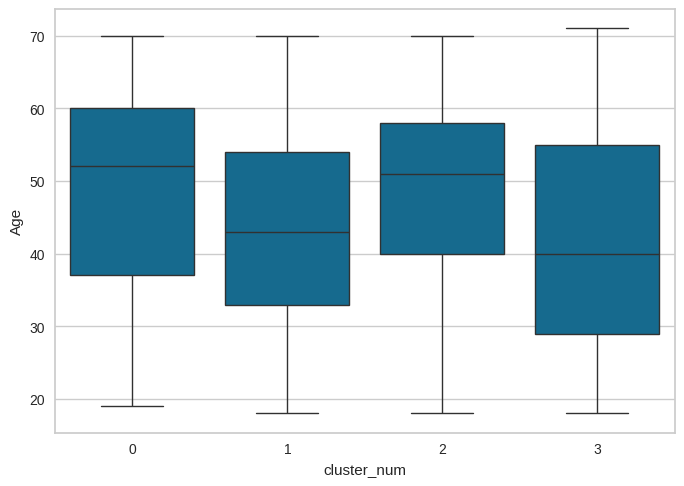

In [ ]:
sns.boxplot(x="cluster_num", y="Age", df=df)
plt.show()

In [ ]:
df['VisitFrequency'] = LabelEncoder().fit_transform(df['VisitFrequency'])
df['Like'] = LabelEncoder().fit_transform(df['Like'])
df['Gender'] = LabelEncoder().fit_transform(df['Gender'])

In [ ]:
visit_mean = df.groupby('cluster_num')['VisitFrequency'].mean().reset_index()
like_mean = df.groupby('cluster_num')['Like'].mean().reset_index()
gender_mean = df.groupby('cluster_num')['Gender'].mean().reset_index()

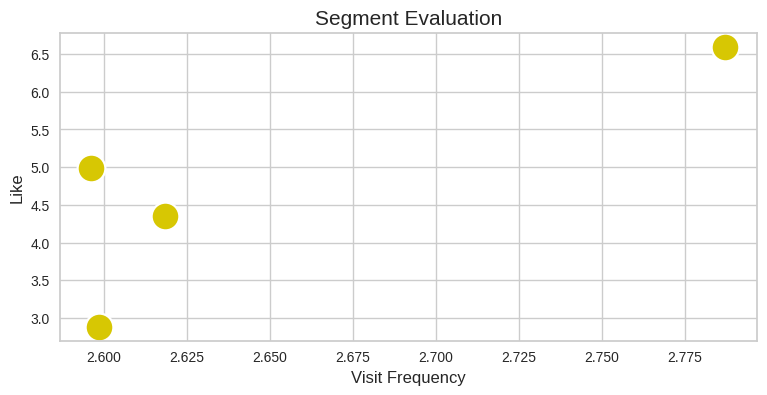

In [ ]:
segment_evaluation = gender_mean.merge(like_mean, on='cluster_num').merge(visit_mean, on='cluster_num')
plt.figure(figsize=(9, 4))
sns.scatterplot(x="VisitFrequency", y="Like", df=segment_evaluation, s=400, color="y")
plt.title("Segment Evaluation", fontsize=15)
plt.xlabel("Visit Frequency", fontsize=12)
plt.ylabel("Like", fontsize=12)
plt.show()

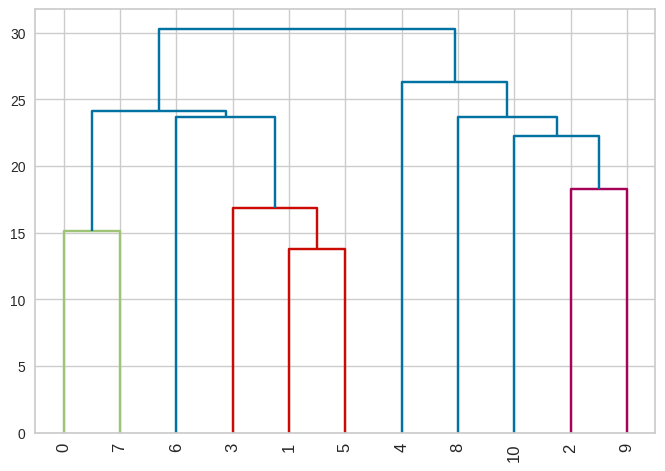

In [56]:
transposed_df = np.transpose(df_encoded)
linked_df = linkage(transposed_df, method='average')
dendrogram(linked_df, truncate_mode='lastp', p=12, leaf_rotation=90, leaf_font_size=12, show_contracted=True)
plt.show()

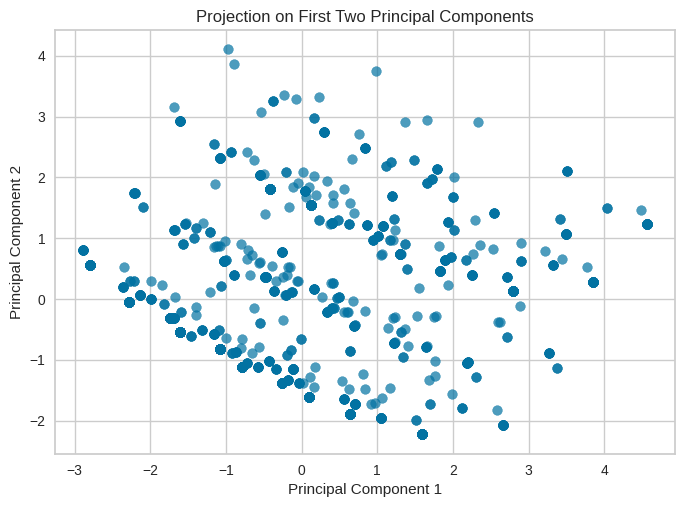

In [57]:
plt.scatter(principal_components[:, 0], principal_components[:, 1], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Projection on First Two Principal Components')
plt.show()

In [58]:
label_encoder_gender = LabelEncoder()
label_encoder_visit_freq = LabelEncoder()
label_encoder_like = LabelEncoder()

df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])
df['VisitFrequency'] = label_encoder_visit_freq.fit_transform(df['VisitFrequency'])
df['Like'] = label_encoder_like.fit_transform(df['Like'])

In [59]:
features = binary_df
target = df['Like']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

In [61]:
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

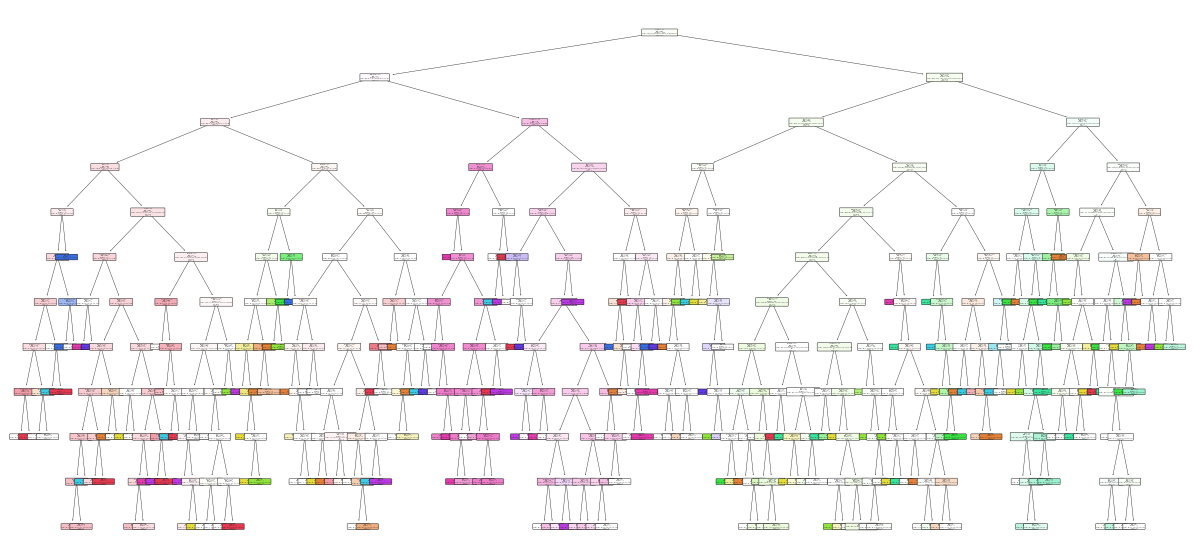

In [62]:
plt.figure(figsize=(15,7))
plot_tree(clf, feature_names=features.columns, class_names=label_encoder_like.classes_.astype(str), filled=True, rounded=True)
plt.show()